# Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/HousePriceRecords.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/analyticsproject/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/analyticsproject'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HousePriceRecords.csv"))
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


Some of the colmuns have missing data. For the purposes of this study, we shall remove those columns. First we need to examine which variables have missing data.

In [5]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [6]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HousePriceRecords.csv")
    .drop(['2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinType1', 'EnclosedPorch', 'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'WoodDeckSF'], axis=1)
    )
df.head()

,1stFlrSF,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,KitchenQual,LotArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,706,150,548,1710,Gd,8450,61,5,7,856,2003,2003,208500
1,1262,978,284,460,1262,TA,9600,0,8,6,1262,1976,1976,181500
2,920,486,434,608,1786,Gd,11250,42,5,7,920,2001,2002,223500
3,961,216,540,642,1717,Gd,9550,35,5,7,756,1915,1970,140000
4,1145,655,490,836,2198,Gd,14260,84,5,8,1145,2000,2000,250000


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [7]:
# from ydata_profiling import ProfileReport
# pandas_report = ProfileReport(df=df, minimal=True)
# pandas_report.to_notebook_iframe()

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business

 # Correlation Study

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head()

(1460, 17)


,1stFlrSF,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,LotArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,706,150,548,1710,8450,61,5,7,856,2003,2003,208500,1,0,0,0
1,1262,978,284,460,1262,9600,0,8,6,1262,1976,1976,181500,0,1,0,0
2,920,486,434,608,1786,11250,42,5,7,920,2001,2002,223500,1,0,0,0
3,961,216,540,642,1717,9550,35,5,7,756,1915,1970,140000,1,0,0,0
4,1145,655,490,836,2198,14260,84,5,8,1145,2000,2000,250000,1,0,0,0


We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations against SalePrice.
* We sort values considering the absolute value, by setting `key=abs`

In [9]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
KitchenQual_Gd    0.478583
OpenPorchSF       0.477561
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [10]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
BsmtFinSF1        0.386420
Name: SalePrice, dtype: float64

For both methods, we notice moderate to strong levels of correlation between SalePrice and a given variable. 

We will consider the top five correlation levels at `df_ohe` and will study the associated variables at `df`

In [11]:
top_n = 4
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt'}

Therefore we are studying at df the following variables. We will investigate the following variables against sale price:
* GarageArea
* GrLivArea
* OVerallQual
* TotalBsmtSF
* YearBuilt

In [12]:
vars_to_study = ['GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']

# EDA on selected variables

In [13]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,548,1710,7,856,2003,208500
1,460,1262,6,1262,1976,181500
2,608,1786,7,920,2001,223500
3,642,1717,7,756,1915,140000
4,836,2198,8,1145,2000,250000


## Variables Distribution by SalePrice

We plot the distribution (in this case they are all numerical) coloured by Sale Price

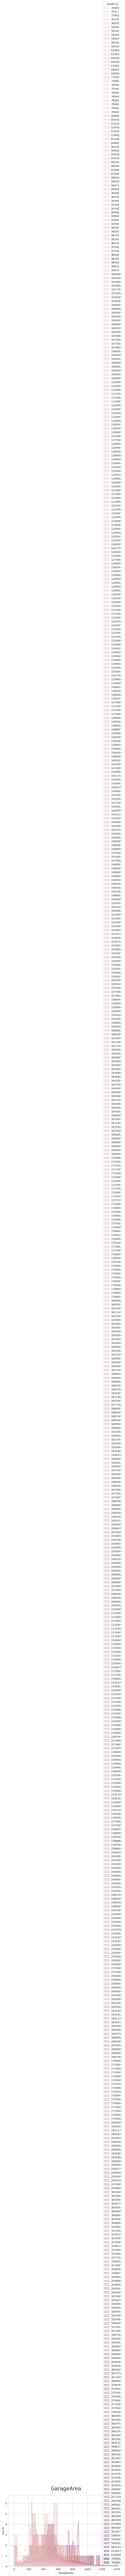

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
        plot(df_eda, col, target_var)
        print("\n\n")

---
---


# Examination of Sale Prices

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.get_dataset_names()

plt.plot(df[['SalePrice']])
plt.show()

As we can see, most of the 1,460 houses sold within the $10k to $30k range, with fewer selling between the $40k to $50k range and only 2 selling for above $70k.

## Variables Distribution by SalePrice

### 1stFlrSF

In [18]:
x, y = '1stFlrSF' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

Summary for above here

### Garage Price

In [19]:
x, y = 'GarageArea' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

Summary for the above here

### Gr Liv Area

In [20]:
x, y = 'GrLivArea' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

Summary for the above here

### Total Basement SF

In [21]:
x, y = 'TotalBsmtSF' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

### YearBuilt

In [22]:
x, y = 'YearBuilt' , 'SalePrice'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

---
---